In [149]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/subset_complete.csv')
df = df.drop(columns=['Unnamed: 0'])
g = nx.from_pandas_edgelist(df[['Source','Destination']], source='Source', target='Destination',create_using=nx.DiGraph())
print(g)


DiGraph with 1000 nodes and 3230 edges


In [175]:
# Page Rank
pr = nx.pagerank(g)
df['Page_Rank_Src'] = df.Source.apply(lambda row: pr.get(row))
df['Page_Rank_Dst'] = df.Destination.apply(lambda row: pr.get(row))



DiGraph with 1000 nodes and 572 edges


In [174]:
# Shortest Path
def get_shortest_path(x, y):
    d = -1
    try:
        if g.has_edge(x, y):
            g.remove_edge(x, y)
            d = nx.shortest_path_length(g, source=x, target=y)
            g.add_edge(x, y)
        else:
            d = nx.shortest_path_length(g, source=x, target=y)
    except:
        d = -1
    return d

df['Shortest_Path'] = df.apply(lambda row: get_shortest_path(row['Source'], row['Destination']), axis = 1)
print(g)


DiGraph with 1000 nodes and 572 edges


In [152]:
df.head(10)

,Source,Destination,Class,Page_Rank_Src,Page_Rank_Dst,Shortest_Path
0,47106,34405,1,0.000737,0.005541,-1
1,47106,8032,1,0.000737,0.017017,-1
2,75824,8032,1,0.001690,0.017017,-1
3,75824,34405,1,0.001690,0.005541,-1
4,76,8032,1,0.000297,0.017017,4
5,282709,8032,1,0.000905,0.017017,3
6,282709,20043,1,0.000905,0.002598,4
7,282709,66878,1,0.000905,0.001418,4
8,307295,8032,1,0.000943,0.017017,-1
9,307295,34405,1,0.000943,0.005541,-1


In [153]:
# Follow Features
followers_src, followers_dst, followees_src, followees_dst, int_followers, int_followees = [], [], [], [], [], []

for i, r in df.iterrows():
    pre_src = set(g.predecessors(r['Source'])) if set(g.predecessors(r['Source'])) else set()
    suc_src = set(g.successors(r['Source'])) if set(g.successors(r['Source'])) else set()

    pre_dst = set(g.predecessors(r['Destination'])) if set(g.predecessors(r['Destination'])) else set()
    suc_dst = set(g.successors(r['Destination'])) if set(g.successors(r['Destination'])) else set()

    followers_src.append(len(pre_src))
    followees_src.append(len(suc_src))

    followers_dst.append(len(pre_dst))
    followees_dst.append(len(suc_dst))

    int_followers.append(len(pre_src.intersection(pre_dst)))
    int_followees.append(len(suc_src.intersection(suc_dst)))
        
df['Followers_Src'] = followers_src
df['Followees_Src'] = followees_src
df['Followers_Dst'] = followers_dst
df['Followees_Dst'] = followees_dst
df['Int_Followers'] = int_followers
df['Int_Followees'] = int_followees

In [154]:
def mutal_follow(a,b):
    if(g.has_edge(b,a)):
        return 1
    else:
        return 0

df['Mutual_Follow']=df.apply(lambda row:
                           mutal_follow(row['Source'],row['Destination']),axis=1)



In [155]:
df.head(5)

,Source,Destination,Class,Page_Rank_Src,Page_Rank_Dst,Shortest_Path,Followers_Src,Followees_Src,Followers_Dst,Followees_Dst,Int_Followers,Int_Followees,Mutual_Follow
0,47106,34405,1,0.000737,0.005541,-1,0,0,12,0,0,0,0
1,47106,8032,1,0.000737,0.017017,-1,0,0,39,0,0,0,0
2,75824,8032,1,0.001690,0.017017,-1,0,0,39,0,0,0,0
3,75824,34405,1,0.001690,0.005541,-1,0,0,12,0,0,0,0
4,76,8032,1,0.000297,0.017017,4,0,4,39,0,0,0,0


In [156]:
def calc_adar_in(a,b):
    sum=0
    try:
        n=list(set(g.successors(a)).intersection(set(g.successors(b))))
        if len(n)!=0:
            for i in n:
                sum=sum+(1/np.log10(len(list(g.predecessors(i)))))
            return sum
        else:
            return 0
    except:
        return 0
    
df['Adar_Index'] = df.apply(lambda row: calc_adar_in(row['Source'], row['Destination']), axis = 1)


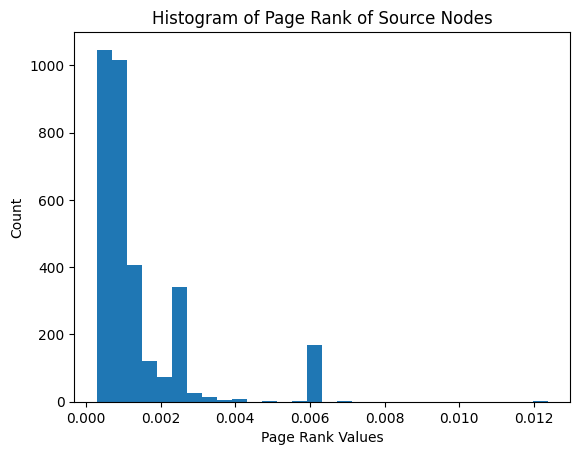

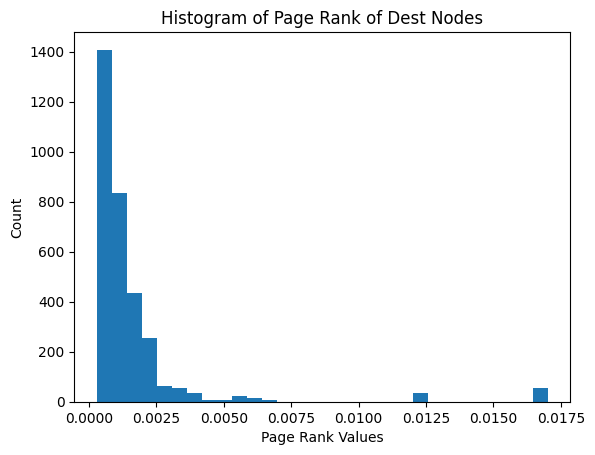

In [157]:

plt.hist(df['Page_Rank_Src'], bins=30)
plt.title('Histogram of Page Rank of Source Nodes')
plt.xlabel('Page Rank Values')
plt.ylabel('Count')
plt.show()


plt.hist(df['Page_Rank_Dst'], bins=30)
plt.title('Histogram of Page Rank of Dest Nodes')
plt.xlabel('Page Rank Values')
plt.ylabel('Count')
plt.show()





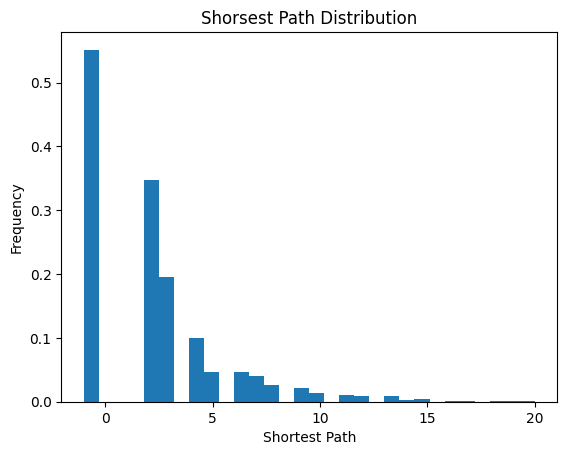

In [158]:
plt.hist(df['Shortest_Path'], bins=30, density=True)
plt.title('Shorsest Path Distribution')
plt.xlabel('Shortest Path')
plt.ylabel('Frequency')
plt.show()

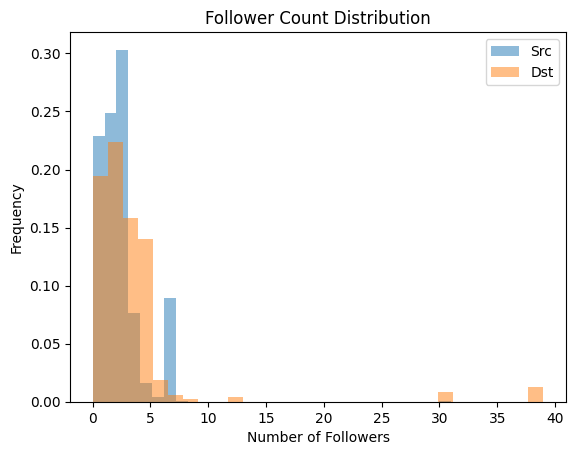

In [159]:
plt.hist(df['Followers_Src'], bins=30, alpha=0.5,density=True,label='Src')
plt.hist(df['Followers_Dst'], bins=30, alpha=0.5,density=True,label='Dst')

plt.title('Follower Count Distribution')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.legend()
plt.show()


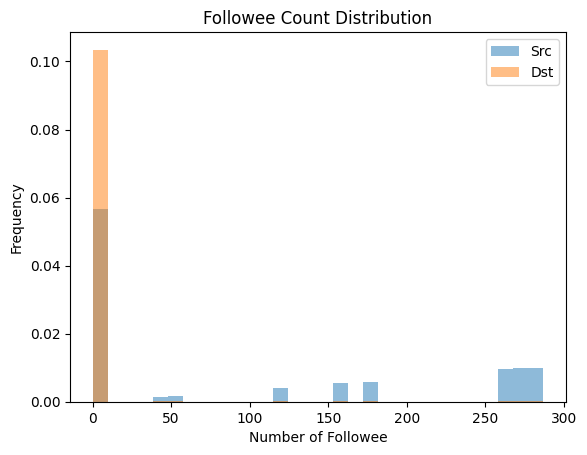

In [160]:
plt.hist(df['Followees_Src'], bins=30, alpha=0.5,density=True,label='Src')
plt.hist(df['Followees_Dst'], bins=30, alpha=0.5,density=True,label='Dst')

plt.title('Followee Count Distribution')
plt.xlabel('Number of Followee')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [178]:
total_mutual=df['Mutual_Follow'].sum()
mutual_percent=total_mutual/3230
total_mutual

18

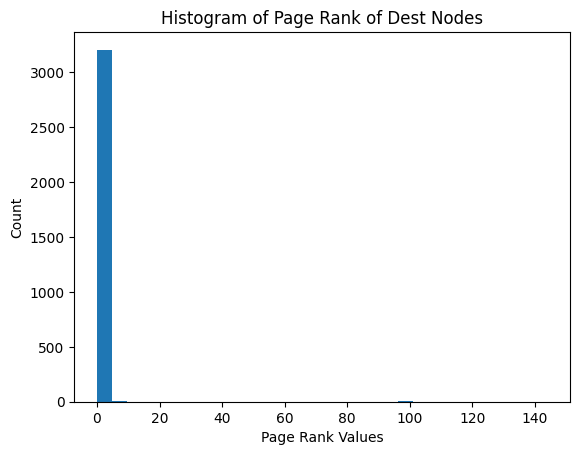

In [179]:
plt.hist(df['Adar_Index'], bins=30)
plt.title('Histogram of Page Rank of Dest Nodes')
plt.xlabel('Page Rank Values')
plt.ylabel('Count')
plt.show()


In [181]:
(df['Adar_Index']!= 0).sum()/3230


0.051702786377708976

In [183]:
gn=nx.non_edges(g)

In [187]:
len(list(gn))

0

In [188]:
df.to_csv('./data/final_dataset.csv')